In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
import glob as gb
import pandas as pd
import seaborn as sns

import tensorflow as tf
from keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import layers
from tensorflow.keras.layers import Input
from tensorflow import keras
from keras.models import Sequential
from keras.layers.convolutional import Conv2D
from keras.callbacks import ReduceLROnPlateau
import json
import cv2
import seaborn as sns
from scipy.stats import norm
import statistics
import random
import shutil
%matplotlib inline

In [2]:
train_dir = './train3/'

In [3]:
train_dir

'./train3/'

In [4]:
trainDir_list = []
for folder in os.listdir(train_dir):
  files = gb.glob(train_dir+folder+'/')
  for file in files:
    trainDir_list.append(str(file))
    print(folder,':',len(os.listdir(str(file))))

Bacterial_spot : 2826
Early_blight : 2452
healthy : 3048
Septoria_leaf_spot : 2881
Target_Spot : 1827
Tomato_Yellow_Leaf_Curl_Virus : 2036


In [5]:
class_names = sorted(os.listdir(train_dir))
print(class_names)

['Bacterial_spot', 'Early_blight', 'Septoria_leaf_spot', 'Target_Spot', 'Tomato_Yellow_Leaf_Curl_Virus', 'healthy']


In [6]:
n_classes = len(class_names)
print(n_classes)

6


[2826, 2452, 2881, 1827, 2036, 3048]
max is  3048 
min is  1827


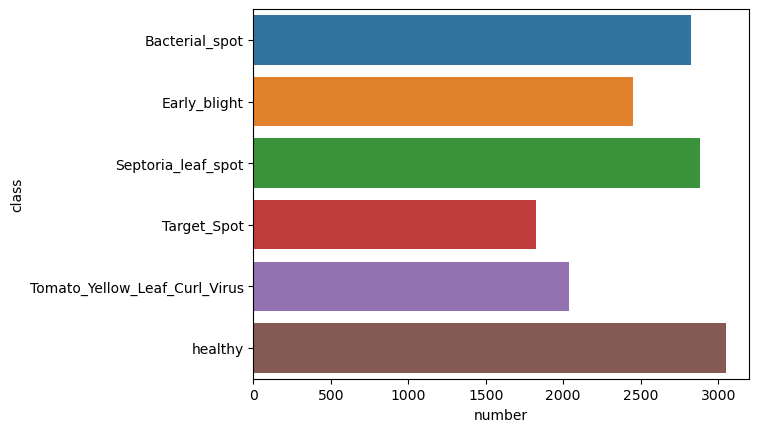

In [7]:
count=[]
for number in class_names :
    count.append(len(os.listdir(train_dir+number)))
print(count)

df = pd.DataFrame({'class':class_names, 'number':count})
g=sns.barplot(data=df,x='number', y='class')

print('max is ',max(count),'\nmin is ',min(count))
# g.set_xticklabels(g.get_xticklabels(), rotation=90) 

In [ ]:
from pathlib import Path
import imghdr

data_dir = train_dir
image_extensions = [".png", ".jpg"]  # add there all your images file extensions

img_type_accepted_by_tf = ["bmp", "gif", "jpeg", "png"]
for filepath in Path(data_dir).rglob("*"):
    if filepath.suffix.lower() in image_extensions:
        img_type = imghdr.what(filepath)
        if img_type is None:
            print(f"{filepath} is not an image")
            os.remove(filepath)
        elif img_type not in img_type_accepted_by_tf:
            print(f"{filepath} is a {img_type}, not accepted by TensorFlow")
            os.remove(filepath)

In [ ]:
count=[]
for number in class_names :
    count.append(len(os.listdir(train_dir+number)))
print(count)

df = pd.DataFrame({'class':class_names, 'number':count})
g=sns.barplot(data=df,x='number', y='class')

print('max is ',max(count),'\nmin is ',min(count))
# g.set_xticklabels(g.get_xticklabels(), rotation=90) 

Add  Digit number eqaul Max of Digit number by

1.   RandomFlip(horizontal)
2.   RandomRotation(0.1) (10 degree)
3.   RandomTranslation
4.   RandomContrast



In [ ]:
tf.get_logger().setLevel('ERROR')

In [ ]:
data_augmentation = tf.keras.Sequential([
  layers.experimental.preprocessing.Rescaling(1./255),
  tf.keras.layers.RandomFlip('horizontal'),
  tf.keras.layers.RandomRotation(0.15),
  tf.keras.layers.RandomTranslation(height_factor=0.1, width_factor=0.1, fill_mode="wrap"),
  tf.keras.layers.RandomContrast(factor=0.2),
])

In [ ]:
for num in class_names :
  k=0
  path_img=train_dir+num

  test_filenames = os.listdir(path_img)
  df_test = pd.DataFrame({'filename': test_filenames})
  test_generator  = ImageDataGenerator().flow_from_dataframe(df_test, 
                                                path_img, 
                                                x_col='filename',
                                                class_mode=None,
                                                target_size=(128, 128),
                                                batch_size=32,
                                                shuffle=False) 

  while len(os.listdir(path_img)) < max(count) :
    x = test_generator.next()
    x_augmented_image = data_augmentation(x)
    for i,j in enumerate(x_augmented_image):
      tf.keras.utils.save_img(path_img+'/datagen'+'-{}'.format(k)+'.jpg',j)
      k+=1
    
    print(len(os.listdir(path_img)),'in',max(count),'(type',num,')')

In [ ]:
count=[]
for number in class_names :
    count.append(len(os.listdir(train_dir+number)))
print(count)

df = pd.DataFrame({'class':class_names, 'number':count})
g=sns.barplot(data=df,x='number', y='class')

print('max is ',max(count),'\nmin is ',min(count))